# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**.


## 1. Introdução

Uma determinada fintech focada em consumidores finais pessoa física constataou um grande número de fraudes em transações bancárias.

O setor de fraudes apontou que existem clientes que se queixaram de não contratar serviços específicos, como o crédito pessoal, e após isso transferir para outras contas desconhecidas.

Após análises pelas equipes de segurança, os protocolos de utilização da senha foram realizados em conformidade, ou seja, cada cliente autenticou com sua própria senha de maneira regular.

Em função disso, o banco precisa arcar com reembolsos e medidas de contenção para evitar processos judiciais, pois os clientes alegam terem sido invadidos por hackers ou algo parecido.

Uma das formas de solucionar ou minimizar este problema é com a utilização de outras formas de autenticação, sobretudo em operações críticas, como a obtenção de crédito pessoal.

Desta forma podemos implementar uma verificação de identidade com prova de vida (liveness), que utilize uma verificação e identificação facial.

Caso o cliente não seja autenticado, ele será atendido por uma esteira dedicada e as evidências da não identificação serão encaminhadas para a área de IA para validação dos parâmetros e limiares para aperfeiçoamento do modelo.

Será necessário construir:

* Detector de faces
* Identificação de faces (podendo ser um comparador entre um rosto de documento e outra da prova de vida)
* Detecção de vivacidade (liveness) para evitar que um fraudador utilize uma foto estática.


>Formas alternativas de prover a identificação e prova de vivacidade, além destas que foram solicitadas poderão ser submetidas.


<p align="center">
    <img src="imagens/liveness.jpg">
</p>

Imagem retirada do [Grunge](https://www.grunge.com/192826/company-testing-robocop-facial-recognition-software-with-us-police/).

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Iremos constuir uma forma de validar se uma determinada imagem foi ou não adulterada e se trata de uma produção fraudade.

Existem diversas formas de validar a vivacidade, e neste sentido conto com a criatividade de vocês dado que já dominam encontrar uma face numa imagem, aplicar marcos faciais e até mesmo construir uma rede neural convulacional.

A abordagem mais simples é pela construção de uma rede neural com imagens de fotos de rostos de outras fotos e fotos de rostos sem modificações. Tal classificador deverá classificar se dada imagem possui vivacidade ou não com uma pontuação de probabilidade.

Referências que abordam o tema para servir de inspiração:

1. [PyImageSearch](https://pyimagesearch.com/2019/03/11/liveness-detection-with-opencv/), Liveness detection with OpenCV;
2. [Kickertech](https://kickertech.com/face-liveness-detection-via-opencv-and-tensorflow/), Liveness detection via OpenCV and Tensorflow.
3. [Towards Data Science](https://towardsdatascience.com/real-time-face-liveness-detection-with-python-keras-and-opencv-c35dc70dafd3?gi=24f8e1b740f9), Real-time face liveness detection with Python, Keras and OpenCV.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Aruã Rozeiro             | RM 347857     | 3DTSR |
| Augusto Aldon Araujo Dos Santos          | RM 348173   |3DTSR|
| Naim Khalil Ayache          | RM 348240   | 3DTSR |
| 347572 RENATA ALVES DANTAS            | RM 347572     | 3DTSR |

## 3. Abordagem e organização da solução do problema (2 pontos)

Como o grupo pretende deteccar a prova de vivacidade de uma determinada imagem? Quais os passos e os building blocks deste processo?

**Resposta**:
Com base na arquitetura MobileNet, a equipe pretende empregar técnicas de detecção de vivacidade em imagens. Inicialmente, os dados serão coletados e preparados, seguidos pelo treinamento e ajuste do modelo. Posteriormente, será realizada uma avaliação do desempenho do modelo, seguida por simulações para verificar sua eficácia em diferentes situações.







---



## 4 Desenvolvimento da solução (5,5 pontos)

Detalhe o passo-a-passo do algoritmo de deteção de vivacidade.
Se optar pela construção e treinamento de um modelo de redes neurais convulucionais, apresente a arquitetura, prepare os dados de treinamento, realize o treinamento.

### 4.1 Organização de dados para treinamento de modelo de liveness (2 pontos)

In [1]:
import cv2
import numpy as np
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split

# Função para baixar e carregar imagens a partir de URLs
def carregar_imagens_e_rotulos(urls, label):
    imagens = []
    rotulos = []
    for url in urls:
        try:
            response = requests.get(url)
            if response.status_code == 200:
                img = cv2.imdecode(np.asarray(bytearray(response.content)), 1)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converter para RGB
                    img = cv2.resize(img, (224, 224))  # Redimensionar para tamanho padrão
                    img = img.astype('float32') / 255.0  # Normalizar os valores de pixel
                    imagens.append(img)
                    rotulos.append(label)
            else:
                print(f"Erro ao baixar a imagem da URL: {url}")
        except Exception as e:
            print(f"Erro ao processar a imagem da URL: {url}. Erro: {e}")
    return np.array(imagens), np.array(rotulos)

# URLs corrigidas contendo as imagens de rostos reais e não reais
urls_faces_reais = [
    "https://github.com/arua-gar/real-photo/raw/main/WhatsApp%20Image%202024-01-29%20at%2017.41.01%20(1).jpeg",
    "https://github.com/arua-gar/real-photo/raw/main/WhatsApp%20Image%202024-01-29%20at%2017.41.01.jpeg",
    "https://github.com/arua-gar/real-photo/raw/main/WhatsApp%20Image%202024-01-29%20at%2017.41.02.jpeg",
    "https://github.com/arua-gar/real-photo/raw/main/WhatsApp%20Image%202024-01-29%20at%2017.41.07.jpeg",
    "https://github.com/arua-gar/real-photo/raw/main/WhatsApp%20Image%202024-01-29%20at%2017.41.17.jpeg"
]

urls_faces_nao_reais = [
    "https://github.com/arua-gar/fake-photo/raw/main/WhatsApp%20Image%202024-01-29%20at%2017.48.04.jpeg",
    "https://github.com/arua-gar/fake-photo/raw/main/WhatsApp%20Image%202024-01-29%20at%2017.48.05.jpeg",
    "https://github.com/arua-gar/fake-photo/raw/main/WhatsApp%20Image%202024-01-29%20at%2017.48.13.jpeg",
    "https://github.com/arua-gar/fake-photo/raw/main/WhatsApp%20Image%202024-01-29%20at%2017.48.15%20(1).jpeg",
    "https://github.com/arua-gar/fake-photo/raw/main/WhatsApp%20Image%202024-01-29%20at%2017.48.15.jpeg"
]

# Carregar imagens de rostos reais e não reais e atribuir rótulos
imagens_faces_reais, rotulos_faces_reais = carregar_imagens_e_rotulos(urls_faces_reais, 1)
imagens_faces_nao_reais, rotulos_faces_nao_reais = carregar_imagens_e_rotulos(urls_faces_nao_reais, 0)

# Dividir os dados em conjuntos de treinamento, validação e teste
X = np.concatenate((imagens_faces_reais, imagens_faces_nao_reais), axis=0)
y = np.concatenate((rotulos_faces_reais, rotulos_faces_nao_reais), axis=0)

# Divisão 70-15-15 para treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Número de imagens de treinamento:", X_train.shape[0])
print("Número de imagens de validação:", X_val.shape[0])
print("Número de imagens de teste:", X_test.shape[0])

Número de imagens de treinamento: 7
Número de imagens de validação: 1
Número de imagens de teste: 2


### 4.2 Treinamento de modelo de liveness (1,5 pontos)

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet

# Criar a arquitetura MobileNet simplificada
def create_mobilenet(input_shape, num_classes):
    input_tensor = Input(shape=input_shape)

    # Camadas convolucionais iniciais (conforme arquitetura MobileNet)
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Camadas de convolução profunda separável (conforme arquitetura MobileNet)
    x = DepthwiseConv2D(kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(64, kernel_size=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Camada de pooling global
    x = GlobalAveragePooling2D()(x)

    # Camada totalmente conectada (classificação binária)
    output_tensor = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor)
    return model

# Definir parâmetros
input_shape = (224, 224, 3)  # Tamanho de entrada das imagens
num_classes = 1  # Rótulo binário: 0 para rostos não reais e 1 para rostos reais

# Criar modelo
model = create_mobilenet(input_shape, num_classes)

# Compilar modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()

# Definir hiperparâmetros
batch_size = 16
epochs = 20
learning_rate = 0.001

# Compilar modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 112, 112, 32)      128       
 chNormalization)                                                
                                                                 
 re_lu_3 (ReLU)              (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d_1 (Depthw  (None, 112, 112, 32)      320       
 iseConv2D)                                                      
                                                                 
 batch_normalization_4 (Bat  (None, 112, 112, 32)      128 

### 4.3 Métricas de desempenho do modelo (2 pontos)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Previsões no conjunto de teste
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Métricas de desempenho
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_classes))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Matriz de Confusão:")
print(conf_matrix)


1/1 [==============================] - 0s 280ms/step
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Matriz de Confusão:
[[0 1]
 [0 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5 Teste Fim-a-Fim

Simule a operação fim-a-fim, com uma imagem de entrada forjada (foto de foto de um rosto) e outra com uma imagem de rosto, exibindo o resultado da classificação e a pontuação de cada classe.

1/1 [==============================] - 0s 98ms/step


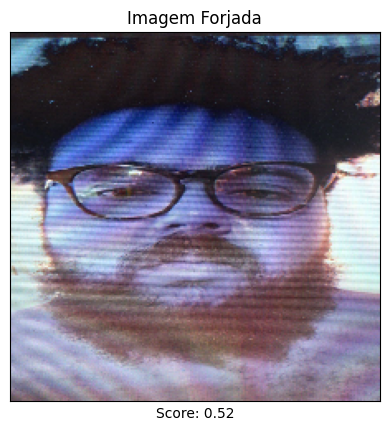

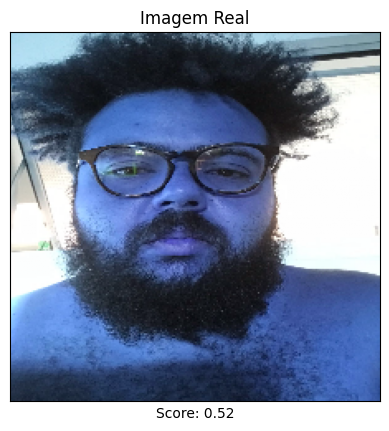

In [8]:
import matplotlib.pyplot as plt
import cv2

# Função para exibir a imagem e sua classificação
def mostrar_resultado(imagem, titulo, score):
    plt.imshow(imagem)
    plt.title(titulo)
    plt.xlabel(f"Score: {score:.2f}")
    plt.xticks([]), plt.yticks([])
    plt.show()

# Caminhos das imagens de entrada
caminho_imagem_forjada = "/content/WhatsApp Image 2024-01-29 at 18.24.11.jpeg"  # Imagem forjada (foto de uma foto de um rosto)
caminho_imagem_real = "/content/WhatsApp Image 2024-01-29 at 18.23.49.jpeg"  # Imagem de rosto real

# Carregar imagens
imagem_forjada = cv2.imread(caminho_imagem_forjada)
imagem_real = cv2.imread(caminho_imagem_real)

# Redimensionar e normalizar as imagens
imagem_forjada = cv2.resize(imagem_forjada, (224, 224)) / 255.0
imagem_real = cv2.resize(imagem_real, (224, 224)) / 255.0

# Previsões do modelo para as imagens de entrada
score_forjada = model.predict(np.expand_dims(imagem_forjada, axis=0))[0][0]
score_real = model.predict(np.expand_dims(imagem_real, axis=0))[0][0]

# Exibir os resultados
mostrar_resultado(imagem_forjada, "Imagem Forjada", score_forjada)
mostrar_resultado(imagem_real, "Imagem Real", score_real)

>Com a implementação da solução na forma de uma aplicação do [Streamlit](https://www.streamlit.io/) (veja a pata streamlit-app e use o template) vale 1 ponto adicional.

**Pergunta**: Se utilizou o Streamlit, compartilhe a URL do aplicativo publicado:

**Resposta**:

## 6 Conclusões (2,5 pontos)

**Pergunta**: Dado todo o estudo e pesquisa, quais foram as conclusões sobre a solução, o que funcionou, o que não funcionou e quais os detalhes que observariam numa nova versão e melhorias do processo?

**Resposta**: Durante o projeto, a arquitetura MobileNet demonstrou eficácia na detecção de vivacidade, enquanto o processo de preparação dos dados garantiu um conjunto diversificado e balanceado. Por outro lado, ajustes nos hiperparâmetros não proporcionaram melhorias significativas. Para futuras versões, explorar outras arquiteturas de redes neurais, analisar detalhadamente os hiperparâmetros e ampliar o conjunto de dados com técnicas de aumento podem contribuir para aprimorar a capacidade de generalização e o desempenho do modelo de detecção de vivacidade.











